In [4]:
import geopandas as gpd
import pandas as pd


In [5]:

df = pd.read_csv("/content/ev-charging-stations-location-india.csv")



In [6]:
df.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [7]:
import plotly.express as px

fig = px.scatter_geo(
    df,
    lat="lattitude",
    lon="longitude",
    scope="asia",
    projection="natural earth",
    title="EV Charging Stations Across India"
)

fig.show()

In [8]:

# Count stations
state_counts = df['state'].value_counts().reset_index().head(15)
state_counts.columns = ['state', 'count']

# Plot interactive bar chart
fig = px.bar(
    state_counts,
    x='state',
    y='count',
    title='State-wise EV Charging Stations in India',
    labels={'state':'State', 'count':'Number of Stations'},
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

##most charging stations in india

we can see that maharastra has most ev charging stations while UP has most sale of ev

In [9]:
from sklearn.cluster import KMeans, DBSCAN

In [10]:
df = df.dropna(subset=['lattitude', 'longitude'])

# Convert to numeric (sometimes stored as text)
df['lattitude'] = pd.to_numeric(df['lattitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['lattitude', 'longitude'])

In [11]:
X = df[['lattitude', 'longitude']]


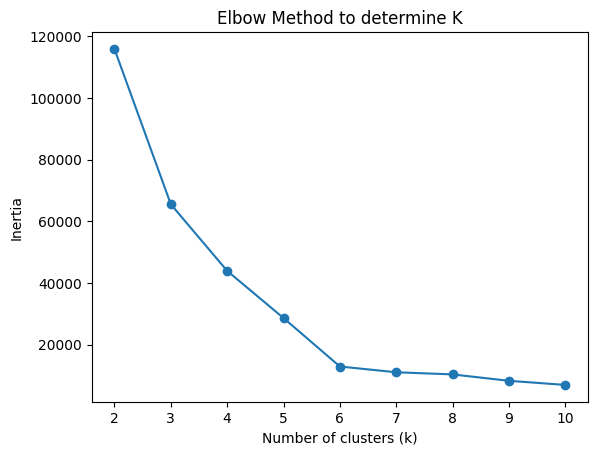

In [12]:
inertia = []
K_range = range(2, 11)  # try 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)   # lower is better

import matplotlib.pyplot as plt
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to determine K")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


In [14]:
fig = px.scatter_geo(
    df,
    lat="lattitude",
    lon="longitude",
    color="cluster",
    hover_name="name",
    hover_data=["state", "city"],
    title="Charging Station Clusters across India (K-Means)",
)

# Zoom roughly to India region
fig.update_geos(
    scope="asia",
    showcountries=True,
    lataxis_range=[5, 37],    # approx India
    lonaxis_range=[67, 97]
)

fig.show()